<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M2/notebooks/M2_NLP_TexVec_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving on to text-vectorization

Before we dive into text-vectorization and representation: A bit something on SpaCy and part-of-speech tagging. Also: We will be using SpaCy as our main pre-processing tool, as it combines most of the things that we need in one convinient api.


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Here is a long article text - again
article = """President Trump has said he came up with the term "fake news. " But the phrase has been in general circulation since the end of the 19th century, according to Merriam-Webster.

Trump was, however, the first US President to deploy it against his opponents. And over the last four years, he has brought the phrase into the mainstream, popularizing it as a smear for unfavorable, but factual coverage.

According to a database maintained by Stephanie Sugars of the US Press Freedom Tracker, Trump has used the phrase "fake news" nearly 900 times in tweets aimed to denigrate the media, insult particular news outlets, discredit supposed leaks and leakers, and allege falsehoods. As election day nears, he's redoubled his efforts bashing the fourth estate, research by Sugars has shown

This has given cover and conferred legitimacy to other politicians hoping to do the same. "Fake news" has been invoked by dozens of leaders, governments and state media around the world, including Syrian President Bashar al-Assad, Venezuelan President Nicolas Maduro, Philippine President Rodrigo Duterte, Polish President Andrzej Duda, former Spanish Foreign Minister Alfonso Dastis, Chinese Ambassador to the United Kingdom Liu Xiaoming and former Malaysia Prime Minister Najib Razak, just to name a few.

"It [fake news rhetoric] has emboldened authoritarians, who are capable of taking even more brutal action against domestic opponents than President Trump can in the US." Allie Funk, a senior research analyst at Freedom House

"There is no question that the fact that the President of the United States is using this term to attack independent media gives an element of license to other politicians elsewhere, including some authoritarian leaders to dress up their own attacks on independent media and point to the example of the US," said Rasmus Kleis Nielsen, director of the Reuters Institute for the Study of Journalism."""

In [3]:
import spacy
nlp = spacy.load("en")

# Let's apply the model to the article (as easy as that)
article_nlp = nlp(article)

In [4]:
# spaCy also splits sentences
[sentance for sentance in article_nlp.sents][:10]

[President Trump has said he came up with the term "fake news.,
 " But the phrase has been in general circulation since the end of the 19th century, according to Merriam-Webster.
 ,
 Trump was, however, the first US President to deploy it against his opponents.,
 And over the last four years, he has brought the phrase into the mainstream, popularizing it as a smear for unfavorable, but factual coverage.
 ,
 According to a database maintained by Stephanie Sugars of the US Press Freedom Tracker, Trump has used the phrase "fake news" nearly 900 times in tweets aimed to denigrate the media, insult particular news outlets, discredit supposed leaks and leakers, and allege falsehoods.,
 As election day nears, he's redoubled his efforts bashing the fourth estate,
 , research by Sugars has shown
 
 This has given cover and conferred legitimacy to other politicians hoping to do the same.,
 ",
 Fake news" has been invoked by dozens of leaders, governments and state media around the world, includi

In [5]:
# And: it will also annotate them with POS-labels
sentance = [sentance for sentance in article_nlp.sents][4]
[(token.text, token.pos_) for token in sentance]

[('According', 'VERB'),
 ('to', 'ADP'),
 ('a', 'DET'),
 ('database', 'NOUN'),
 ('maintained', 'VERB'),
 ('by', 'ADP'),
 ('Stephanie', 'PROPN'),
 ('Sugars', 'PROPN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('US', 'PROPN'),
 ('Press', 'PROPN'),
 ('Freedom', 'PROPN'),
 ('Tracker', 'PROPN'),
 (',', 'PUNCT'),
 ('Trump', 'PROPN'),
 ('has', 'AUX'),
 ('used', 'VERB'),
 ('the', 'DET'),
 ('phrase', 'NOUN'),
 ('"', 'PUNCT'),
 ('fake', 'ADJ'),
 ('news', 'NOUN'),
 ('"', 'PUNCT'),
 ('nearly', 'ADV'),
 ('900', 'NUM'),
 ('times', 'NOUN'),
 ('in', 'ADP'),
 ('tweets', 'NOUN'),
 ('aimed', 'VERB'),
 ('to', 'PART'),
 ('denigrate', 'VERB'),
 ('the', 'DET'),
 ('media', 'NOUN'),
 (',', 'PUNCT'),
 ('insult', 'PROPN'),
 ('particular', 'ADJ'),
 ('news', 'NOUN'),
 ('outlets', 'NOUN'),
 (',', 'PUNCT'),
 ('discredit', 'NOUN'),
 ('supposed', 'VERB'),
 ('leaks', 'NOUN'),
 ('and', 'CCONJ'),
 ('leakers', 'NOUN'),
 (',', 'PUNCT'),
 ('and', 'CCONJ'),
 ('allege', 'VERB'),
 ('falsehoods', 'NOUN'),
 ('.', 'PUNCT')]

In [6]:
# We can use this to extract only tokens that we think bear most of the meaning
[token.text for token in sentance if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 

['database',
 'Stephanie',
 'Sugars',
 'Press',
 'Freedom',
 'Tracker',
 'Trump',
 'phrase',
 'fake',
 'news',
 'nearly',
 'times',
 'tweets',
 'media',
 'insult',
 'particular',
 'news',
 'outlets',
 'discredit',
 'leaks',
 'leakers',
 'falsehoods']

In [7]:
# Also, we can create lemmas, thus reducing heterogeneity in the vocabulary without sacrificing much meaning

[tok.lemma_ for tok in nlp("a text about innovations and all kinds things which goes nowhere")]

['a',
 'text',
 'about',
 'innovation',
 'and',
 'all',
 'kind',
 'thing',
 'which',
 'go',
 'nowhere']

In [8]:
# Isn't that great?

[token.lemma_.lower() for token in sentance if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 

['database',
 'stephanie',
 'sugars',
 'press',
 'freedom',
 'tracker',
 'trump',
 'phrase',
 'fake',
 'news',
 'nearly',
 'time',
 'tweet',
 'medium',
 'insult',
 'particular',
 'news',
 'outlet',
 'discredit',
 'leak',
 'leaker',
 'falsehood']

Thus we have created a representation of a text that is probably as "minimal" as possible - Maximising meaning and minimising "noise"

In the last part of this notebook we will try to use such representations to explore the content of text collections

### Bag of words model

In order for a computer to understand text we need to somehow find a useful representation.
If you need to compare different texts e.g. articles, you will probably go for keywords. These keywords may come from a keyword-list with for example 200 different keywords
In that case you could represent each document with a (sparse) vector with 1 for "keyword present" and 0 for "keyword absent"
We can also get a bit more sophoistocated and count the number of times a word from our dictionary occurs.
For a corpus of documents that would give us a document-term matrix
![example](https://i.stack.imgur.com/C1UMs.png)

Let's try creating a bag of words model from our initial example.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    
     'A text about cats.',
     'A text about dogs.',
     'And another text about a dog.',
     'Why always writing about cats and dogs, always dogs?',
   ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [10]:
pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

,about,always,and,another,cats,dog,dogs,text,why,writing
0,1,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1,1,0,0
2,1,0,1,1,0,1,0,1,0,0
3,1,2,1,0,1,0,2,0,1,1


#### TF-IDF - Term Frequency - Inverse Document Frequency

A token is importan for a document if appears very often
A token becomes less important for comparaison across a corpus if it appears all over the place in the corpus

*Innovation* in a corpus of abstracts talking about innovation is not that important

\begin{equation*}
w_{i,j} = tf_{i,j}*log(\frac{N}{df_i})
\end{equation*}

- $w_{i,j}$ = the TF-IDF score for a term i in a document j
- $tf_{i,j}$ = number of occurence of term i in document j
- $N$ = number of documents in the corpus
- $df_i$ = number of documents with term i


We will use TF-IDF to transform our corpus. However, first we need to fir the TF-IDF model.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [12]:
pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

,about,always,and,another,cats,dog,dogs,text,why,writing
0,0.457453,0.000000,0.000000,0.000000,0.691131,0.000000,0.000000,0.559530,0.000000,0.000000
1,0.457453,0.000000,0.000000,0.000000,0.000000,0.000000,0.691131,0.559530,0.000000,0.000000
2,0.287207,0.000000,0.433919,0.550372,0.000000,0.550372,0.000000,0.351295,0.000000,0.000000
3,0.165005,0.632396,0.249294,0.000000,0.249294,0.000000,0.498588,0.000000,0.316198,0.316198


In [13]:
# let's fist install this nice visualizer
!pip install -qq pyLDAvis

In [14]:
# and import it
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

We will be using a dataset from EU Cordis which describes H2020 research projects. No tweets for now.

http://data.europa.eu/euodp/en/data/dataset/cordisH2020projects

In [15]:
# I put a little sample (500 observations) of the data on github

reports = pd.read_csv('https://github.com/SDS-AAU/SDS-master/raw/master/M2/data/cordis-h2020reports.gz')

In [16]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      500 non-null    int64  
 1   rcn             500 non-null    int64  
 2   language        500 non-null    object 
 3   title           500 non-null    object 
 4   teaser          500 non-null    object 
 5   summary         500 non-null    object 
 6   workPerformed   499 non-null    object 
 7   finalResults    499 non-null    object 
 8   lastUpdateDate  499 non-null    object 
 9   country         0 non-null      float64
 10  projectID       499 non-null    float64
 11  projectAcronym  499 non-null    object 
 12  programme       499 non-null    object 
 13  topics          499 non-null    object 
 14  url             457 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 58.7+ KB


In [17]:
# reindec
reports.index = range(len(reports))

In [18]:
# now, let's combine everything that we learned about preprocessing in a few lines of code

tokens = []

for summary in nlp.pipe(reports['summary']):
  proj_tok = [token.lemma_.lower() for token in summary if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

In [21]:
# Let's bring the tokens back in

reports['tokens'] = tokens

In [ ]:
reports['tokens'][3]

Another library that you have to know when doing NLP (once you progress to DeepLearning and recent stuff probably not any more but for now) is gensim

https://radimrehurek.com/gensim/

This is the library that handles all kinds of statistical NLP tasks and goes as far as implementing (super efficient) embedding model training (next class)
But: With NLP today being all BERT, ELMO and transformers probably declining in importance. Back in 2013 gensim was a major discovery and breakthrough helper when I was working on my PhD. One more reason to have a look at it.



In [24]:
!pip install -qq -U gensim

In [ ]:
# Import the dictionary builder
from gensim.corpora.dictionary import Dictionary

In [26]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(reports['tokens'])

In [27]:
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [28]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in reports['tokens']]

In [30]:
# That's how the corpus looks
corpus[3][:10]

[(7, 1),
 (15, 1),
 (21, 1),
 (22, 4),
 (23, 1),
 (26, 2),
 (27, 1),
 (35, 1),
 (36, 1),
 (40, 1)]

### Topic modelling - NLP meets unsupervised ML

The corpus is a list of tuples, with word-ids and the number of their occurrence in documents: LDA - https://youtu.be/DWJYZq_fQ2A

We will start with a topic modelling approach that is good for interpretable topics but not too much for further processing

![alt text](https://miro.medium.com/max/1600/1*pZo_IcxW1GVuH2vQKdoIMQ.jpeg)


In [31]:
# we'll use the faster multicore version of LDA

from gensim.models import LdaMulticore

In [32]:
# Training the model
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)

In [33]:
# Check out topics
lda_model.print_topics(-1)

[(0,
  '0.027*"datum" + 0.017*"service" + 0.016*"-" + 0.013*"research" + 0.011*"european" + 0.011*"data" + 0.009*"application" + 0.009*"science" + 0.009*"platform" + 0.008*"public"'),
 (1,
  '0.037*"child" + 0.033*"human" + 0.019*"study" + 0.016*"change" + 0.013*"language" + 0.013*"social" + 0.011*"analysis" + 0.011*"communication" + 0.011*"interaction" + 0.010*"concept"'),
 (2,
  '0.024*"disease" + 0.023*"patient" + 0.023*"clinical" + 0.014*"care" + 0.014*"health" + 0.013*"system" + 0.013*"treatment" + 0.011*"study" + 0.011*"cell" + 0.011*"model"'),
 (3,
  '0.037*"energy" + 0.015*"people" + 0.015*"user" + 0.014*"%" + 0.014*"plan" + 0.014*"building" + 0.012*"market" + 0.011*"cost" + 0.011*"phase" + 0.010*"business"'),
 (4,
  '0.024*"sme" + 0.024*"innovation" + 0.017*"food" + 0.015*"market" + 0.014*"eu" + 0.014*"service" + 0.011*"phase" + 0.011*"management" + 0.011*"business" + 0.011*"product"'),
 (5,
  '0.022*"system" + 0.020*"market" + 0.016*"process" + 0.016*"technology" + 0.014*"ene

In [34]:
# Where does a text belong to?
lda_model[corpus][0]

[(5, 0.30025846), (9, 0.6893487)]

In [35]:
reports['summary'][0]

'Polyaniline has historically been one of the most promising conductive polymers from a cost/performance perspective, but processing issues have limited its uptake. Building upon seminal work on polyaniline performed at the CEA, RESCOLL (an independent research company based in France specialized in chemistry materials) has developed and patented a new electrically conductive polyaniline formulation under the trade name of PANIPLAST™. \n\nPANIPLAST polymers are safe-by-design, REACh compliant, low cost, easily produced materials which can be used to produce highly concentrated dispersions which exhibit very high electrical conductivities and improved stability. \n\nThe unique and versatile nature of PANIPLAST technology opens up new opportunities to create a vast range of products based upon its excellent electrical conductivity such as conductive resins, conductive coatings, ultrathin films, inks etc.\nPANIPLAST is a material with great market potential and is an innovative response t

In [36]:
# Let's try to visualize
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)


In [37]:
# Let's Visualize
pyLDAvis.display(lda_display)

In [38]:
# In case you run a website and want to publish it...or embed it in a blogpost...
pyLDAvis.save_html(lda_display, 'lda.html')

In [39]:
# And that's how you get the topic-number that's ranked highest

print(sorted([(2, 0.121567), (9, 0.8610384)], key=lambda x: -x[1]))
print(sorted([(2, 0.121567), (9, 0.8610384)], key=lambda x: -x[1])[0][0])

[(9, 0.8610384), (2, 0.121567)]
9


From here, you can assign topics to texts...do some EDA, explore how topics evolve over time etc.

Finally, let's try out LSA (an older topic-moddeling approach similar to NMF) - thus unsupervised ML

More on LDA: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/


### Your Turn:

![alt text](https://media.giphy.com/media/1zjRp3fs05jhjTuwr3/giphy.gif)

Perform an LDA analysis of the #OKBoomer dataset

- Filter the corpus using `tweet-preprocessor` - try to figure out how to use it using it's documentation
- Clean up further with SpaCy (keep only ADV, ADJ, NOUN)
- Use Gensim to build a Dictionary (Filter extremes) and Corpus
- Use Gensim to run LDA
- Identify 10 topics
- Plot topic-counts by day

In [40]:
# Import the TfidfModel from Gensim
from gensim.models.tfidfmodel import TfidfModel

In [41]:
# Create and fit a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

In [42]:
# Now we can transform the whole corpus
tfidf_corpus = tfidf[corpus]

In [43]:
# Just like before, we import the model
from gensim.models.lsimodel import LsiModel

# And we fir it on the tfidf_corpus pointing to the dictionary as reference and the number of topics.
# In more serious settings one would pick between 300-400
lsi = LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100)

In [44]:
lsi.show_topics(num_topics=10)

[(0,
  '0.124*"market" + 0.115*"product" + 0.111*"system" + 0.108*"energy" + 0.107*"research" + 0.101*"material" + 0.100*"datum" + 0.099*"cell" + 0.097*"technology" + 0.097*"innovation"'),
 (1,
  '-0.547*"cell" + -0.247*"disease" + -0.184*"cancer" + -0.173*"protein" + -0.147*"stem" + -0.128*"patient" + -0.127*"drug" + -0.125*"mechanism" + -0.121*"tissue" + -0.110*"gene"'),
 (2,
  '-0.238*"sme" + -0.230*"innovation" + 0.229*"water" + 0.188*"energy" + -0.180*"research" + 0.167*"material" + 0.157*"cell" + -0.136*"social" + -0.117*"service" + -0.108*"people"'),
 (3,
  '0.228*"sme" + 0.198*"feasibility" + 0.183*"market" + -0.162*"research" + -0.155*"science" + -0.153*"material" + -0.147*"quantum" + 0.137*"patient" + 0.132*"business" + 0.131*"plan"'),
 (4,
  '0.401*"cell" + 0.367*"sme" + 0.196*"innovation" + -0.193*"water" + -0.182*"health" + -0.177*"disease" + -0.165*"treatment" + -0.157*"patient" + 0.136*"stem" + 0.132*"instrument"'),
 (5,
  '-0.247*"food" + 0.236*"datum" + -0.210*"water" 

In [45]:
# And just as before, we can use the trained model to transform the corpus
lsi_corpus = lsi[tfidf_corpus]

In [46]:
# Load the MatrixSimilarity
from gensim.similarities import MatrixSimilarity

# Create the document-topic-matrix
document_topic_matrix = MatrixSimilarity(lsi_corpus)
document_topic_matrix_ix = document_topic_matrix.index

In [48]:
# this now allows us to perform similarity-queries

sims = document_topic_matrix[lsi_corpus[0]]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)

[(0, 1.0), (475, 0.66321707), (146, 0.58479154), (103, 0.5585234), (20, 0.52586937), (60, 0.45380157), (418, 0.44865164), (162, 0.43601996), (220, 0.42094985), (118, 0.41939396), (133, 0.4139856), (396, 0.39859667), (275, 0.38971195), (450, 0.38541448), (171, 0.37900043), (364, 0.373286), (154, 0.36948442), (50, 0.36807922), (13, 0.3674369), (301, 0.36440226), (358, 0.35976624), (268, 0.35946536), (199, 0.35654908), (128, 0.35433745), (264, 0.34794855), (62, 0.34623113), (85, 0.3435998), (348, 0.33460397), (344, 0.33337533), (178, 0.33159113), (420, 0.33036238), (289, 0.33028334), (24, 0.32883576), (474, 0.3267151), (270, 0.3250921), (67, 0.32296586), (230, 0.31759572), (472, 0.30672774), (391, 0.29933885), (484, 0.299115), (399, 0.29893756), (76, 0.2960518), (257, 0.2833495), (277, 0.2815896), (323, 0.27994886), (198, 0.27837765), (494, 0.27813885), (167, 0.27611914), (387, 0.27344057), (104, 0.27341443), (8, 0.2729878), (406, 0.2691489), (297, 0.26211712), (245, 0.26143193), (102, 0.

We will go deeper into how that works next time
The last bit is a bit of a quick bonus and should be super familiar from M1.

Since we now have a matrix with observations and features - why not trying to apply unsupervisd ML that we know from M1?

In [49]:
# dimensionali lity reduction for plotting
import umap
embeddings = umap.UMAP(n_neighbors=15, metric='cosine').fit_transform(document_topic_matrix_ix)

#------------------------------
# we could use that too

#from sklearn.decomposition import PCA

#reduced = PCA(n_components = 10).fit_transform(document_topic_matrix_ix)

In [50]:
# Nothing new here
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters = 10)
clusterer.fit(document_topic_matrix_ix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


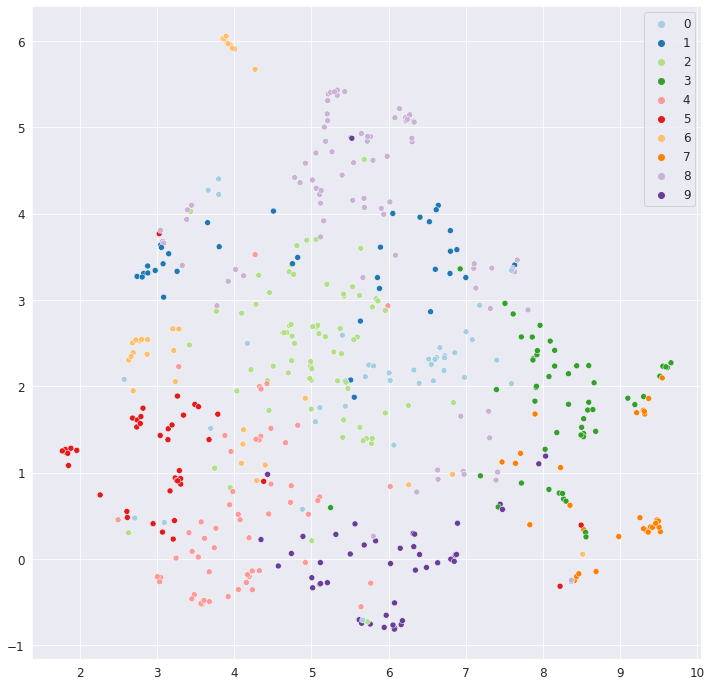

In [52]:
# Plotting things
sns.set_style("darkgrid")

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,12))
g = sns.scatterplot(*embeddings.T,
                    #reduced[:,0],reduced[:,1],
                   hue=clusterer.labels_,
                    palette="Paired",
                   legend='full')

In [53]:
# Let's explore the clusters ... that should actually correlate with topics found by LDA
reports['cluster'] = clusterer.labels_

In [54]:
reports[reports['cluster'] == 2]['teaser']

1      Problem/issue: Increasing digitalisation enabl...
8      While access to 3D-printing technology becomes...
16     Most healthcare software applications are inco...
43     With the promise of offering ultra-reliable, l...
49     NFFA-Europe research infrastructure (RI) (www....
                             ...                        
464    The SSIX project is a Big data and Open Data I...
479    Many prospect customers, in the market segment...
484    Currently, over 40 years of television records...
488    The Drone Critical Communications (DroC2om) pr...
495    HEMAV, a technology-based SME leader in civil ...
Name: teaser, Length: 72, dtype: object

In [55]:
from gensim.matutils import corpus2dense

In [56]:
# Let's check out the topics by getting "top-tfidf" for the different clusters (and we need to transponse)
tfidf_matrix = corpus2dense(tfidf_corpus, len(dictionary)).T

In [57]:
# write cluster-numbers into our data
reports['cluster'] = clusterer.labels_

In [58]:
# Get indices to subset the matrix
cluster_index = reports[reports['cluster'] == 2].index

In [59]:
tfidf_matrix[cluster_index,:].shape

(72, 1000)

In [60]:
# Use numpy to sum up columns for tfidf, get the indices of the sorted values, and flip (descending), and only top 10
topk = np.flip(np.argsort(np.sum(tfidf_matrix[cluster_index,:], axis=0)))[:10]

In [61]:
# Use dictionary to get the words from indices
[dictionary[x] for x in topk]

['datum',
 'service',
 'data',
 'infrastructure',
 'network',
 'software',
 'cloud',
 'platform',
 'user',
 'system']

In [62]:
# Let's loop it

for i in set(clusterer.labels_):
  cluster_index = reports[reports['cluster'] == i].index
  topk = np.flip(np.argsort(np.sum(tfidf_matrix[cluster_index,:], axis=0)))[:10]

  print(str(i) + str([dictionary[x] for x in topk]))

0['feasibility', 'market', 'business', 'study', 'phase', 'plan', 'product', 'commercial', 'technical', 'strategy']
1['people', 'citizen', 'transport', 'digital', 'user', 'road', 'care', 'vehicle', 'safety', 'mobility']
2['datum', 'service', 'data', 'infrastructure', 'network', 'software', 'cloud', 'platform', 'user', 'system']
3['disease', 'patient', 'drug', 'treatment', 'clinical', 'brain', 'protein', 'diagnostic', 'death', 'health']
4['material', 'aircraft', 'process', 'manufacturing', 'composite', 'power', 'metal', 'operation', 'design', 'electrical']
5['water', 'energy', '%', 'building', 'fuel', 'air', 'consumption', 'emission', 'system', 'cost']
6['food', 'sme', 'innovation', 'management', 'instrument', 'carbon', 'waste', 'consumer', 'gas', 'package']
7['cell', 'cancer', 'stem', 'gene', 'plant', 'tissue', 'protein', 'mechanism', 'cellular', 'mouse']
8['research', 'science', 'researcher', 'social', 'country', 'community', 'public', 'european', 'innovation', 'activity']
9['quantum',